In [1]:
# Import all of the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
cof = pd.read_csv('/content/coffee_shop_transactions.csv')

# Observe first five rows
cof.head()

,TransactionID,Latte,Hazelnut Latte,Vanilla Latte,Creamy Aren Latte,Caramel Latte,Matcha Latte,Cappuccino,Caramel Macchiato,Americano,Matcha Bun,Cheese Toast,Chocolate Toast,Butter Toast,Cookies,Croissant,Egg Salad Toast,Fries,Crispy Chicken Nuggets
0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,3,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
3,4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,5,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0


In [3]:
# Drop the transaction id column
cof = cof.drop(columns=['TransactionID'])

# Observe first five rows
cof.head()

,Latte,Hazelnut Latte,Vanilla Latte,Creamy Aren Latte,Caramel Latte,Matcha Latte,Cappuccino,Caramel Macchiato,Americano,Matcha Bun,Cheese Toast,Chocolate Toast,Butter Toast,Cookies,Croissant,Egg Salad Toast,Fries,Crispy Chicken Nuggets
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0


In [4]:
# Check the unique values in each column
cof.nunique()

,0
Latte,2
Hazelnut Latte,2
Vanilla Latte,2
Creamy Aren Latte,2
Caramel Latte,2
Matcha Latte,2
Cappuccino,2
Caramel Macchiato,2
Americano,2
Matcha Bun,2


In [5]:
# Apply the Apriori algorithm to find frequent itemsets
freqitem = apriori(cof, min_support=0.001, use_colnames=True)

# Generate association rules from the frequent itemsets
apr = association_rules(freqitem, metric="lift")

# Observe first five rows
apr.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Latte),(Hazelnut Latte),0.138,0.173,0.021,0.152174,0.879618,1.0,-0.002874,0.975436,-0.137014,0.072414,-0.025183,0.136781
1,(Hazelnut Latte),(Latte),0.173,0.138,0.021,0.121387,0.879618,1.0,-0.002874,0.981092,-0.141989,0.072414,-0.019272,0.136781
2,(Latte),(Caramel Latte),0.138,0.158,0.019,0.137681,0.871400,1.0,-0.002804,0.976437,-0.146179,0.068592,-0.024132,0.128967
3,(Caramel Latte),(Latte),0.158,0.138,0.019,0.120253,0.871400,1.0,-0.002804,0.979827,-0.149133,0.068592,-0.020588,0.128967
4,(Latte),(Matcha Latte),0.138,0.169,0.032,0.231884,1.372095,1.0,0.008678,1.081868,0.314603,0.116364,0.075673,0.210617


In [6]:
# Sort the association rules by support, confidence, and lift in descending order
apr.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
29,(Creamy Aren Latte),(Hazelnut Latte),0.164,0.173,0.039,0.237805,1.374595,1.0,0.010628,1.085024,0.325972,0.130872,0.078361,0.231619
28,(Hazelnut Latte),(Creamy Aren Latte),0.173,0.164,0.039,0.225434,1.374595,1.0,0.010628,1.079313,0.329520,0.130872,0.073485,0.231619
220,(Egg Salad Toast),(Chocolate Toast),0.169,0.172,0.035,0.207101,1.204073,1.0,0.005932,1.044269,0.203954,0.114379,0.042392,0.205294
221,(Chocolate Toast),(Egg Salad Toast),0.172,0.169,0.035,0.203488,1.204073,1.0,0.005932,1.043299,0.204693,0.114379,0.041502,0.205294
91,(Creamy Aren Latte),(Fries),0.164,0.175,0.034,0.207317,1.184669,1.0,0.005300,1.040769,0.186462,0.111475,0.039172,0.200801
174,(Americano),(Cheese Toast),0.169,0.173,0.034,0.201183,1.162910,1.0,0.004763,1.035281,0.168578,0.110390,0.034079,0.198858
186,(Americano),(Fries),0.169,0.175,0.034,0.201183,1.149620,1.0,0.004425,1.032778,0.156615,0.109677,0.031737,0.197735
222,(Chocolate Toast),(Fries),0.172,0.175,0.034,0.197674,1.129568,1.0,0.003900,1.028261,0.138534,0.108626,0.027484,0.195980
175,(Cheese Toast),(Americano),0.173,0.169,0.034,0.196532,1.162910,1.0,0.004763,1.034266,0.169393,0.110390,0.033131,0.198858
162,(Cheese Toast),(Caramel Macchiato),0.173,0.173,0.034,0.196532,1.136022,1.0,0.004071,1.029288,0.144783,0.108974,0.028454,0.196532


In [7]:
# Create a new column to combine antecedents and consequents for visualization
top = apr.head(10)
top['rule'] = top['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' + top['consequents'].apply(lambda x: ', '.join(list(x)))

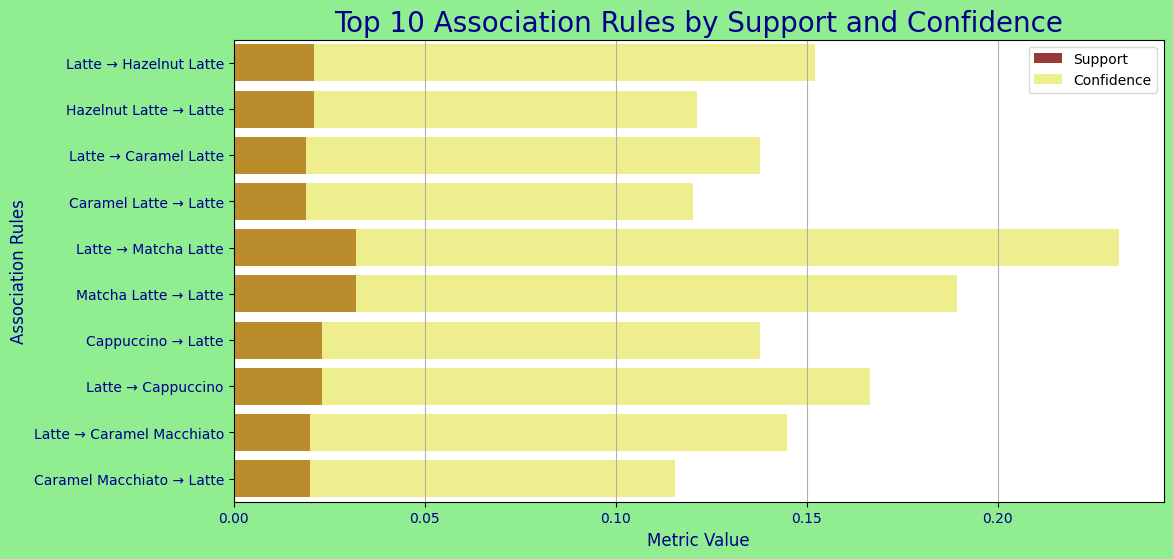

In [8]:
# Plot the association rule
plt.figure(figsize=(12, 6), facecolor='lightgreen')
sns.barplot(x='support', y='rule', data=top, color='brown', label='Support')
sns.barplot(x='confidence', y='rule', data=top, color='yellow', alpha=0.5, label='Confidence')
plt.title('Top 10 Association Rules by Support and Confidence', fontsize=20, color = 'darkblue')
plt.xlabel('Metric Value', fontsize=12, color = 'darkblue')
plt.ylabel('Association Rules', fontsize=12, color = 'darkblue')
plt.xticks(fontsize=10, color = 'darkblue')
plt.yticks(fontsize=10, color = 'darkblue')
plt.legend()
plt.grid(axis='x')
plt.show()